In [1]:
%load_ext autoreload
%autoreload 2

from base64 import b64encode
import copy
from datetime import datetime
import getopt
import io
from io import BytesIO
import os
import sys

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', figsize=(20, 12))

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

module_path = os.path.abspath(os.path.join('../lddecode'))
if module_path not in sys.path:
    sys.path.append(module_path)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lddecode.utils import *
import lddecode.core as core

# Notebook-only functions go here

# Draws a uint16 image, downscaled to uint8
def draw_raw_bwimage(bm, x = 2800, y = 525, hscale = 1, vscale = 2, outsize = None):
    if y is None:
        y = len(bm) // x
        
    if outsize is None:
        outsize = (x * hscale, y * vscale)
    
    bmf = np.uint8(bm[0:x*y] / 256.0)
    print(bmf.shape)
    if x is not None:
        bms = (bmf.reshape(len(bmf)//x, -1))
    else:
        bms = bmf
    
    print(bms.dtype, bms.shape, bms[:][0:y].shape)
    im = Image.fromarray(bms[0:y])
    im = im.resize(outsize)
    b = BytesIO()
    im.save(b, format='png')
    return IPython.display.Image(b.getvalue())


In [2]:
matplotlib.rc('figure', figsize=(20, 12))

In [10]:
filename = '../../ld-decode-testdata/ggv_cbar_5500-v2800.lds'
outname = 'devbook'
system = 'NTSC'
foutput = False
loader = load_packed_data_4_40

firstframe = 0
req_frames = 3

ldd = core.LDdecode(filename, outname, loader, system=system)
ldd.roughseek(firstframe * 2)
ldd.blackIRE = 7.5

fields = []
for i in range(0, req_frames * 2):
    fields.append(ldd.readfield())
    

file frame 0 CAV frame 5498
file frame 1 CAV frame 5499
file frame 2 CAV frame 5500


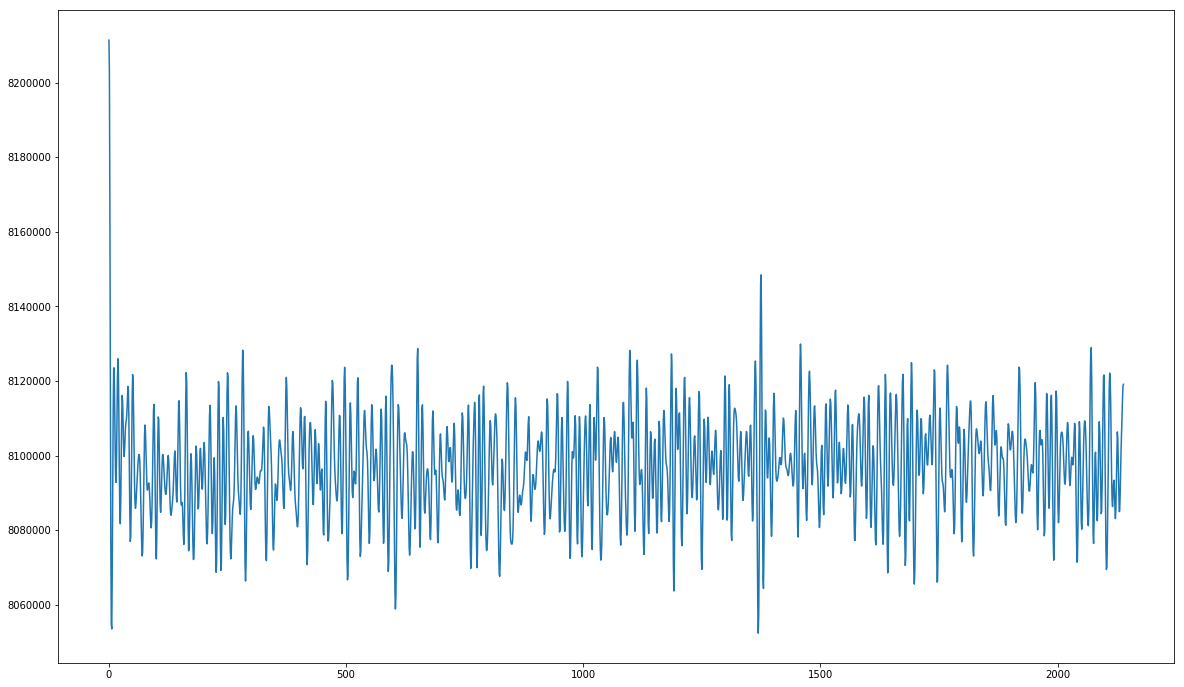

In [11]:
f = fields[1]

ls = f.lineslice(20, 8, 53.5)
plt.plot(f.data['video']['demod'][ls])

In [33]:
f = fields[2]

In [34]:
crosspoint = f.hz_to_output(f.rf.iretohz(-20))

In [35]:
zcs = []
for l in range(10, 263):
    linecut = f.dspicture[910 * l:(910 * l) + 200].astype(np.double)
    zcs.append(calczc(linecut, 10, crosspoint, 1, 100))
    #print(l, calczc(linecut, 10, crosspoint, 1, 100))
    
zcs = np.array(zcs)

In [40]:
zcs.mean(), zcs.std(), zcs.max()-np.median(zcs), np.median(zcs)-zcs.min()

(68.00511839798725,
 0.07502663031631915,
 0.1912787814890038,
 0.19615128450369923)

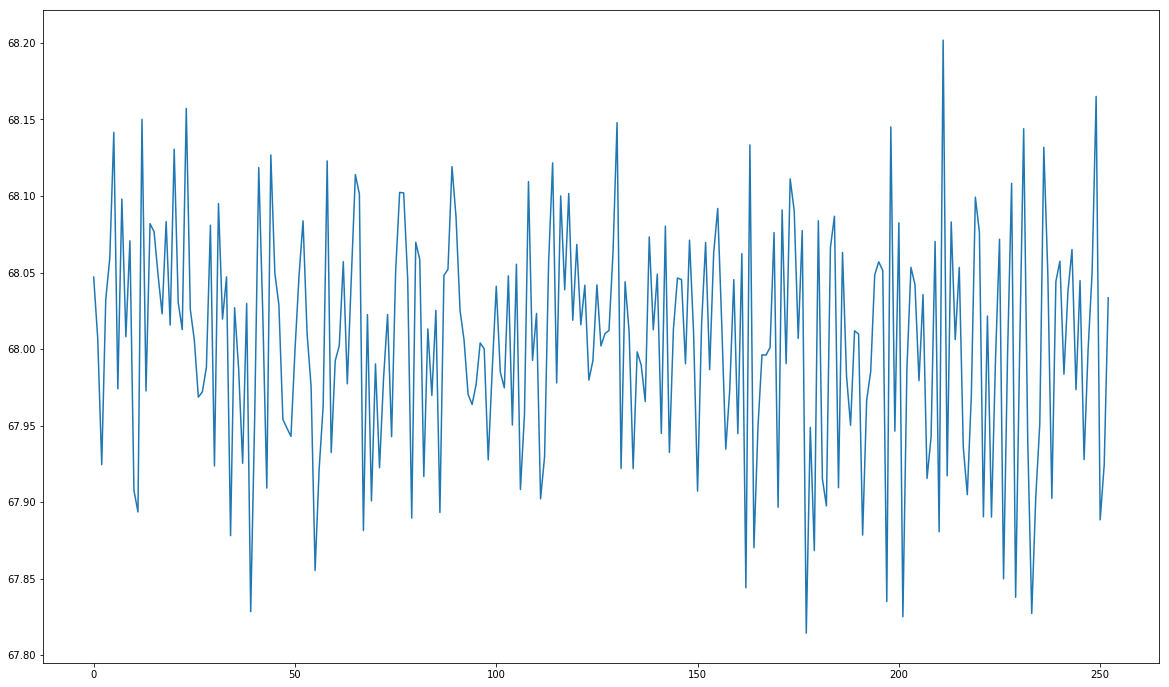

In [39]:
plt.plot(zcs)

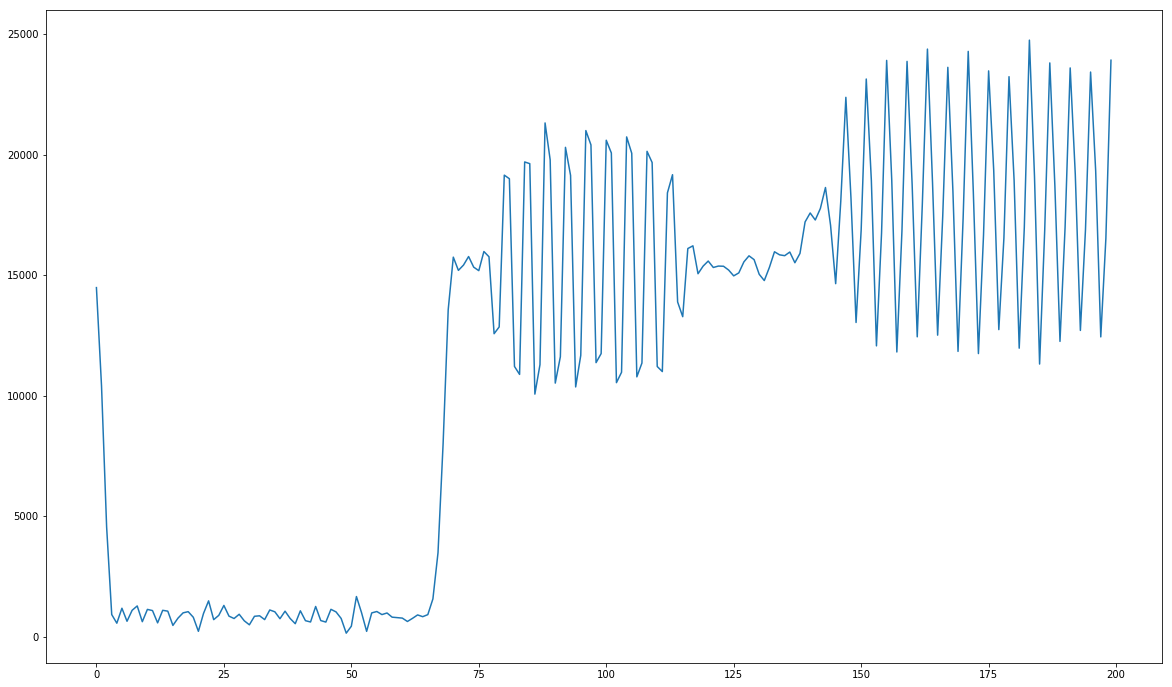

In [38]:
plt.plot(linecut)

In [ ]:
plt.plot()

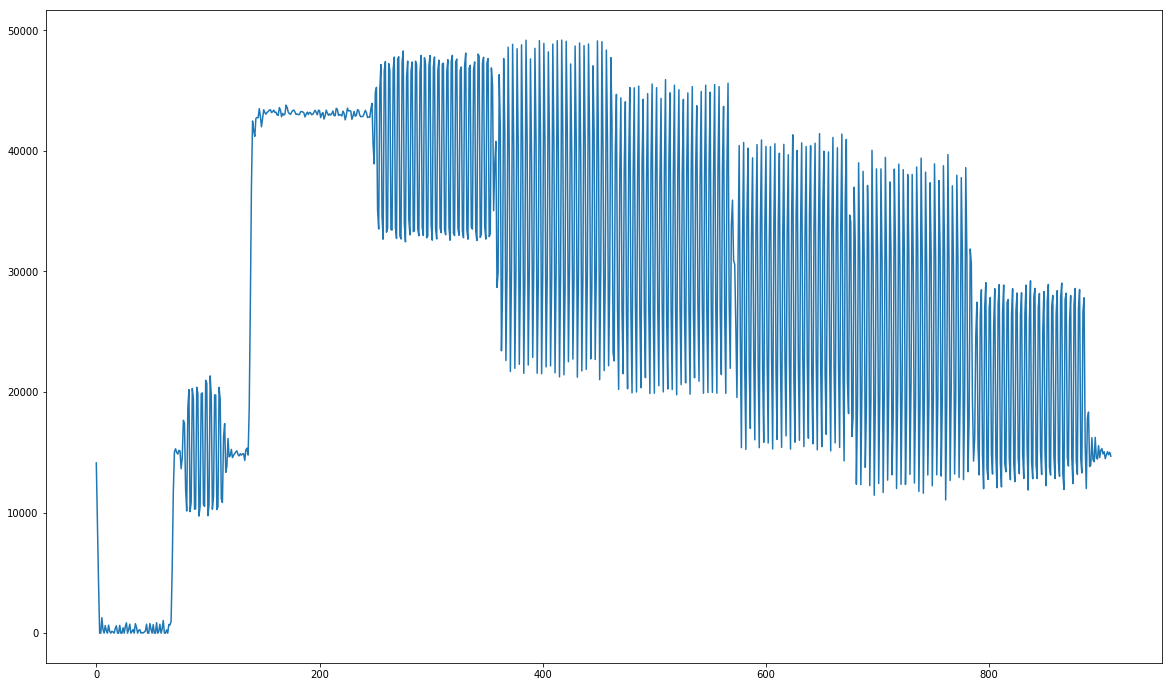

In [23]:
l = 50
plt.plot(f.dspicture[l*910:(l+1)*910])

In [43]:
360*(.08/4)

7.2

In [9]:
fields[0].data['video']['demod']

array([9314366.158948  , 9313296.48331725, 9315698.36748476, ...,
       8178921.19761911, 8067744.40434873, 7951097.16145791])